In [49]:
import numpy as np

In [3]:
# Make Predictions with k-nearest neighbors on the Iris Flowers Dataset
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
		print('[%s] => %d' % (value, i))
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

# Make a prediction with KNN on Iris Dataset
filename = 'iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# define model parameter
num_neighbors = 5
# define a new record
row = [5.7,2.9,4.2,1.3]
# predict the label
label = predict_classification(dataset, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, label))

ValueError: could not convert string to float: 'Id'

In [6]:

# Example of getting neighbors for an instance
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
	print(neighbor)

# Example of getting neighbors for an instance
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
 
# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
	print(neighbor)

[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]
[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]


In [7]:
class K_Means:

	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

In [42]:
#lire csv
import pandas as pd
df = pd.read_csv("dataset_1.csv", index_col=0)
df.head()

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561


In [43]:
X = df.values #returns a numpy array*

In [44]:
X

array([[ 0.68026725, -0.01634235],
       [ 3.80951844,  0.79848348],
       [-1.6613724 , -0.57766695],
       ...,
       [-5.86152028,  3.06842556],
       [-5.01893361,  3.11090369],
       [-6.79933099,  2.08232074]])

In [45]:
dataset = df.astype(float).values.tolist()

In [46]:
dataset

[[0.6802672542242796, -0.01634235124987707],
 [3.809518438642478, 0.7984834812700092],
 [-1.6613723957898987, -0.5776669509655612],
 [-0.2573072541060864, -0.15555172507163811],
 [0.6980174532952329, 0.17456128595470471],
 [2.4722649618370576, 0.5673050456691022],
 [0.2068475280378083, -0.027433765917567986],
 [0.5672463565362535, 0.08908340767516418],
 [-0.34876904840186146, -0.23147121282208094],
 [-1.4519627568129319, -0.3729450658857801],
 [1.1111516122486131, 0.5167464197595522],
 [-1.2616805346909512, -0.38330962804852736],
 [-2.4724216468179, -0.8087217322382667],
 [-0.3182125450439171, -0.07944939174047805],
 [2.4979099088304846, 0.43446558652426825],
 [0.6428762833236951, 0.1357702652711778],
 [-3.367353995980676, -0.7035400125265595],
 [0.2657932474767661, 0.09733080257420727],
 [2.0440457429334997, 0.35792287144099244],
 [-0.5139146759780705, -0.08218841848933901],
 [-2.4140304932042578, -0.4631518783648809],
 [3.3163181718940424, 0.9509371771552172],
 [-0.7447263127390168, 

In [38]:
class K_Means:

    def __init__(self, k = 2):
        self.k = k
        
        
        self.centroids = {}
        #initialiser nombre 'k' de centroids
        for i in range(self.k):
            self.centroids[i] = df[i]
                    
        
        #creer les labels
        self.classes = {}
        for i in range(self.k):
            self.classes[i] = []
            print(self.classes)
        
        
        #find the distance between the point and cluster; choose the nearest centroid
		for features in data:
			distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
			classification = distances.index(min(distances))
			self.classes[classification].append(features)

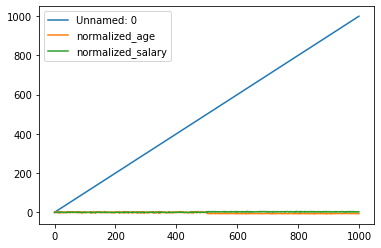

In [32]:
df.plot()

In [98]:
#centroid1 = np.random.choice(X.shape[0], n, replace=False)
#centroid2 =

In [76]:
df.tail()

,normalized_age,normalized_salary
995,-5.060165,2.482045
996,-5.079404,2.773580
997,-5.861520,3.068426
998,-5.018934,3.110904
999,-6.799331,2.082321


In [88]:
index_centroid = np.random.choice(X.shape[0], 2, replace=False)

In [89]:
X.shape[0]

1000

In [93]:
index_centroid

array([573, 501])

In [90]:
centroid1 = X[index_centroid[0]]
centroid2 = X[index_centroid[1]]

In [91]:
centroid1

array([-6.11883081,  2.90610705])

In [92]:
centroid2

array([-6.29562038,  3.07329982])

In [83]:
#index_centroid2 = np.random.choice(X.shape[0], 2, replace=False)

In [84]:
#centroid2 = X[index_centroid2[0]]

In [85]:
#centroid2

In [24]:
#plot

In [ ]:
#choix du nombres de centroids

In [134]:
#calcul de la distance de chaque à chaque centroids

#lister les 2 centroids initialisés
centroids = [[centroid1, centroid2]]

#dupliquer la matrice
X1 = X.copy()
X2 = X.copy()


#parcourir la matrice pour faire les soustractions

for i in range(len(X)):
    X1[i] = X1[i] - centroid1
    print(X)

#idem en comprehension de liste : 
#X[:] = [X - cluster1 for number in X]
#print(numbers)

[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.082

 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11

In [135]:
for i in range(len(X)):
    X2[i] = X2[i] - centroid1
    print(X2)

[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.082

 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11

In [136]:
#X.shape

In [99]:
#calcul de la moyenne de chaque colonne


def columns_means(data):
    means = [0 for i in range(len(data[0]))]
    for i in range(len(data[0])):
        column_values = [row[i] for row in data]
        means[i] = sum(column_values) / float(len(data))
    return means #liste des moyennes



In [122]:
#distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in centroids]

In [ ]:
        #find the distance between the point and cluster; choose the nearest centroid
		for features in data:
			distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
			classification = distances.index(min(distances))
			self.classes[classification].append(features)

In [8]:
#distance euclidienne par ex

In [ ]:
#réassigner les points en fonction

In [10]:
# moyenne sse par cluster
#clusters_sse = []

In [94]:
# tolerance = 0.01
#ou quand lalgo converge ! càd ex_centroid = nv_centroid

### 